In [1]:
import os
import pickle
import glob
import gzip
from tqdm import tqdm_notebook as tqdm
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import collections

In [2]:
os.chdir('/home/admin_user/デスクトップ/data')

'/home/admin_user'

In [ ]:
#DS_PAIR

In [51]:
csv_list = sorted(glob.glob('ds_pair*.csv'))
print("file : 疾患症状ペアの数,ペアの種類数, disease_MeSHの種類数, symptom_MeSHの種類数")
for file in tqdm(csv_list):
    df = pd.read_csv(file)
    print(file, ":ds_pair文献数:", df["PMID"].nunique())

file : 疾患症状ペアの数,ペアの種類数, disease_MeSHの種類数, symptom_MeSHの種類数


<ipython-input-51-2c10250ce1f0>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for file in tqdm(csv_list):


  0%|          | 0/6 [00:00<?, ?it/s]

ds_pair_m2011.csv :ds_pair文献数: 1197883
ds_pair_m2011_1966_new.csv :ds_pair文献数: 1095255
ds_pair_m2011_zhou.csv :ds_pair文献数: 768369
ds_pair_m2021.csv :ds_pair文献数: 1259690
ds_pair_m2021_1966_new.csv :ds_pair文献数: 1152527
ds_pair_m2021_zhou.csv :ds_pair文献数: 799859


In [44]:
csv_list = sorted(glob.glob('dd_pair*.csv'))
print("file : 疾患症状ペアの種類数, disease_MeSHの種類数, symptom_MeSHの種類数")
for file in tqdm(csv_list):
    df = pd.read_csv(file)
    print(file, ":", len(df), df["disease"].nunique(), df["symptom"].nunique() )

file : 疾患症状ペアの種類数, disease_MeSHの種類数, symptom_MeSHの種類数


<ipython-input-44-6e39af2534a4>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for file in tqdm(csv_list):


  0%|          | 0/10 [00:00<?, ?it/s]

dd_pair_m2011.csv : 176054 4305 319
dd_pair_m2011_cut.csv : 83274 4305 319
dd_pair_m2011_zhou.csv : 135250 4186 318
dd_pair_m2011_zhou_cut.csv : 64375 4186 318
dd_pair_m2021.csv : 197466 4679 385
dd_pair_m2021_1966_new.csv : 182176 4662 384
dd_pair_m2021_1966_new_cut.csv : 87808 4662 384
dd_pair_m2021_cut.csv : 94377 4679 385
dd_pair_m2021_zhou.csv : 145670 4304 357
dd_pair_m2021_zhou_cut.csv : 69354 4304 357


In [ ]:
#DD_PAIR

In [3]:
os.chdir('/home/admin_user/デスクトップ/data')
csv_list = sorted(glob.glob('dd_pair*.csv'))
for file in tqdm(csv_list):
    print(file)
    

<ipython-input-3-c468180cbb1d>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for file in tqdm(csv_list):


  0%|          | 0/10 [00:00<?, ?it/s]

dd_pair_m2011.csv
dd_pair_m2011_cut.csv
dd_pair_m2011_zhou.csv
dd_pair_m2011_zhou_cut.csv
dd_pair_m2021.csv
dd_pair_m2021_1966_new.csv
dd_pair_m2021_1966_new_cut.csv
dd_pair_m2021_cut.csv
dd_pair_m2021_zhou.csv
dd_pair_m2021_zhou_cut.csv


<ipython-input-12-527ee61ea55f>:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for file in tqdm(csv_list):


  0%|          | 0/10 [00:00<?, ?it/s]

<ipython-input-12-527ee61ea55f>:11: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.loglog(basex=10,basey=10)
<ipython-input-12-527ee61ea55f>:11: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.loglog(basex=10,basey=10)


ポイントの数は共起数の種類数 829


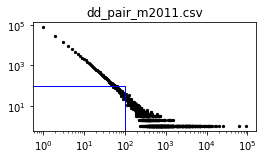

ポイントの数は共起数の種類数 827


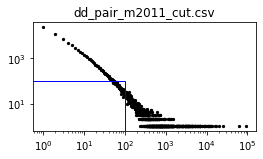

ポイントの数は共起数の種類数 646


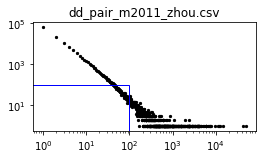

ポイントの数は共起数の種類数 645


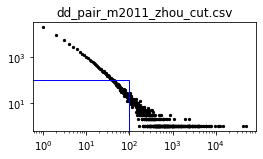

ポイントの数は共起数の種類数 865


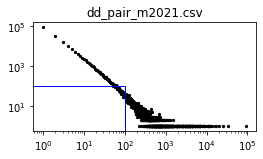

ポイントの数は共起数の種類数 804


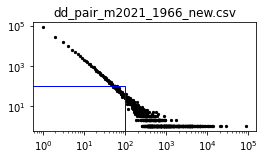

ポイントの数は共起数の種類数 802


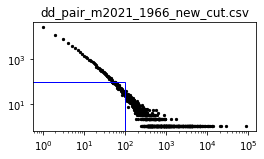

ポイントの数は共起数の種類数 864


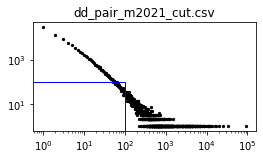

ポイントの数は共起数の種類数 671


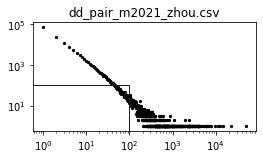

ポイントの数は共起数の種類数 670


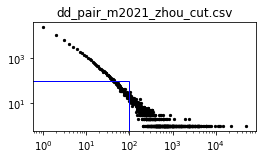

In [12]:
import matplotlib.pyplot as plt
from matplotlib import patches

csv_list = sorted(glob.glob('dd_pair*.csv'))
for file in tqdm(csv_list):
    fig, ax = plt.subplots(figsize=(4,2))
    r = patches.Rectangle( (0,0) , 100, 100, fill=False, edgecolor="blue")  
    freq_df = pd.read_csv(file).groupby('co_occurrence').count().sort_index(ascending=False).iloc[:,:1]
    freq_df.columns = ["co_occurrence_num_freq"]
    plt.scatter(freq_df.index, freq_df["co_occurrence_num_freq"], color="black", s=5)
    plt.loglog(basex=10,basey=10)
    print("ポイントの数は共起数の種類数", len(freq_df))
    plt.title(file)
    ax.add_patch(r)
    plt.show()

<ipython-input-13-8e91122a79ac>:9: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.loglog(basex=10,basey=10)
<ipython-input-13-8e91122a79ac>:9: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.loglog(basex=10,basey=10)


ポイントの数は共起数の種類数 706


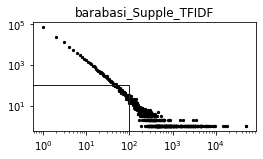

In [13]:
os.chdir('/home/admin_user/')
for i in sorted(glob.glob('*Supplementary Data 3.txt')):
    fig, ax = plt.subplots(figsize=(4,2))
    r = patches.Rectangle( (0,0) , 100, 100, fill=False, edgecolor="blue")   
    
    freq_df = pd.read_table(i).groupby('PubMed occurrence').count().sort_index(ascending=False).iloc[:,:1]
    freq_df.columns = ["co_occurrence_num_freq"]
    plt.scatter(freq_df.index, freq_df["co_occurrence_num_freq"], color="black", s=5)
    plt.loglog(basex=10,basey=10)
    #plt.axhline(y=100)# xmin= 0, xmax=0.43)
    #plt.axvline(x=100)#, ymin= 0, ymax=0.43)  
    print("ポイントの数は共起数の種類数", len(freq_df))
    plt.title("barabasi_Supple_TFIDF")
    ax.add_patch(r)
    plt.show()

In [52]:
df_list = ["b_ycut", "b_ncut", "our_ycut", "our_ncut", "all_ycut", "all_ncut", "b_2011_ycut", "b_2011_ncut", "b_cos"]

#pair数, disease数
for i in df_list:
    print(i, len(eval(i)), len(set(eval(i)["disease_1"].values.tolist() + eval(i)["disease_2"].values.tolist())))

b_ycut 4891408 4304
b_ncut 7403646 4304
our_ycut 6313780 4662
our_ncut 9115843 4662
all_ycut 6581757 4679
all_ncut 9343924 4679
b_2011_ycut 4554078 4186
b_2011_ncut 7012846 4186
b_cos 133106 1596


In [41]:
csv_list = sorted(glob.glob('dd_pair*.csv'))
for file in tqdm(csv_list[:1]):
    df = pd.read_csv(file)
    print(df[100:120])

<ipython-input-41-310b5f1df781>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for file in tqdm(csv_list[:1]):


  0%|          | 0/1 [00:00<?, ?it/s]

                   symptom                    disease  co_occurrence
100    Olfaction Disorders        Olfaction Disorders           2508
101  Psychomotor Agitation      Psychomotor Agitation           2495
102    Sensation Disorders        Sensation Disorders           2452
103   Color Vision Defects       Color Vision Defects           2440
104                Paresis                    Paresis           2439
105      Cerebellar Ataxia          Cerebellar Ataxia           2375
106  Jaundice, Obstructive      Jaundice, Obstructive           2345
107          Shoulder Pain              Shoulder Pain           2314
108            Albuminuria     Diabetic Nephropathies           2261
109           Dysmenorrhea               Dysmenorrhea           2220
110       Reflex, Abnormal           Reflex, Abnormal           2213
111       Angina, Unstable      Myocardial Infarction           2147
112           Birth Weight    Pregnancy Complications           2145
113            Torticollis        

In [30]:
os.chdir('/home/admin_user/デスクトップ/data')

csv_list = sorted(glob.glob('hsdn*.csv'))
#pair数, disease数
for file in tqdm(csv_list):
    df = pd.read_csv(file)
    print(df.columns)
    #
    
    print(file, len(df), len(set(df["disease_1"].values.tolist() + df["disease_2"].values.tolist())))

<ipython-input-30-8fc50820d6ee>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for file in tqdm(csv_list):


  0%|          | 0/10 [00:00<?, ?it/s]

Index(['symptom', 'disease', 'co_occurrence'], dtype='object')


KeyError: 'disease_1'

In [60]:
for i in df_list[2:3]:
    print(i)
    print(eval(i).columns)
    print(len(eval(i)), len(set(eval(i)["disease_1"].values.tolist() + eval(i)["disease_2"].values.tolist())))
    #print(eval(i)["cosine_similarity"].max(), eval(i)["cosine_similarity"].min())
    print( len(eval(i)[ (eval(i)["cosine_similarity"]>0.1)]))
    print( len(eval(i)[ (eval(i)["cosine_similarity"]>0.1) & (eval(i)["cosine_similarity"]<1) ]))
    G = nx.from_pandas_edgelist(eval(i),"disease_1", "disease_2" )
    print(nx.info(G))


our_ycut
Index(['disease_1', 'disease_2', 'cosine_similarity'], dtype='object')
6313780 4662
1567690
1567414
Name: 
Type: Graph
Number of nodes: 4662
Number of edges: 6313780
Average degree: 2708.6143


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

#plt.hist(nx.degree_histogram(G), alpha=0.2, bins=20, color='r') 

for i in df_list:
    G = nx.from_pandas_edgelist(eval(i),"disease_1", "disease_2" )
    print(i)
    print(nx.info(G))
    print("-------")

In [9]:
#全疾患数半分より大きい次数を持つ疾患MeSHタームの数
for i in df_list:
    G = nx.from_pandas_edgelist(eval(i),"disease_1", "disease_2" )
    num = len(pd.DataFrame(nx.degree(G)) [ pd.DataFrame(nx.degree(G))[1]>(G.number_of_nodes()/2) ])
    num_1 = num/ G.number_of_nodes()
    print(i, G.number_of_nodes(), num, num_1)


b_ycut 4304 2371 0.5508828996282528
b_ncut 4304 3910 0.908457249070632
our_ycut 4662 3041 0.6522951522951523
our_ncut 4662 4373 0.938009438009438
all_ycut 4679 3226 0.6894635605898697
all_ncut 4679 4428 0.9463560589869631
b_2011_ycut 4186 2226 0.5317725752508361
b_2011_ncut 4186 3806 0.9092212135690396
b_cos 1596 5 0.003132832080200501


In [10]:
#もっとも次数の高い疾患MeSHターム もっとも次数の低い疾患MeSHターム
for i in df_list:
    G = nx.from_pandas_edgelist(eval(i),"disease_1", "disease_2" )
    print(i, "most:", sorted(G.degree(), key=lambda x: -x[1])[:1])
    print(i, "least:", sorted(G.degree(), key=lambda x: -x[1])[-1:])

b_ycut most: [('Pregnancy Complications', 4261)]
b_ycut least: [('Tachypnea', 1)]
b_ncut most: [('Postoperative Complications', 4293)]
b_ncut least: [('Tachypnea', 1)]
our_ycut most: [('Intellectual Disability', 4645)]
our_ycut least: [('Alcoholic Korsakoff Syndrome', 9)]
our_ncut most: [('Postoperative Complications', 4658)]
our_ncut least: [('Alcoholic Korsakoff Syndrome', 9)]
all_ycut most: [('Neoplasms', 4670)]
all_ycut least: [('Alcoholic Korsakoff Syndrome', 9)]
all_ncut most: [('Postoperative Complications', 4675)]
all_ncut least: [('Alcoholic Korsakoff Syndrome', 9)]
b_2011_ycut most: [('Pain', 4163)]
b_2011_ycut least: [('Necrolytic Migratory Erythema', 8)]
b_2011_ncut most: [('Postoperative Complications', 4178)]
b_2011_ncut least: [('Necrolytic Migratory Erythema', 8)]
b_cos most: [('Precursor Cell Lymphoblastic Leukemia-Lymphoma', 1046)]
b_cos least: [('Torticollis', 1)]


print(i, "least:", sorted(G.degree(), key=lambda x: -x[1])[-44:])

    ・1966.1.1～（バラバシ）
    ・MeSH2021
    ・χ二乗検定でカットした 
    =>b_ycut

b_ycut Name: 
Type: Graph
Number of nodes: 4304
Number of edges: 4891408
Average degree: 2272.9591


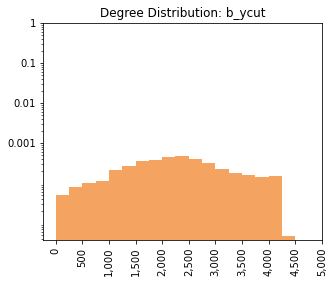

b_ncut Name: 
Type: Graph
Number of nodes: 4304
Number of edges: 7403646
Average degree: 3440.3559


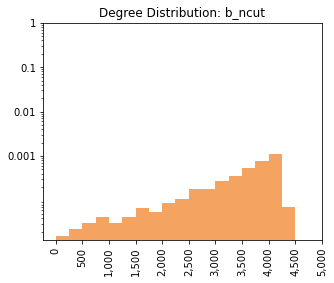

our_ycut Name: 
Type: Graph
Number of nodes: 4662
Number of edges: 6313780
Average degree: 2708.6143


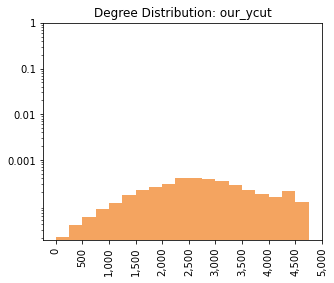

our_ncut Name: 
Type: Graph
Number of nodes: 4662
Number of edges: 9115843
Average degree: 3910.7006


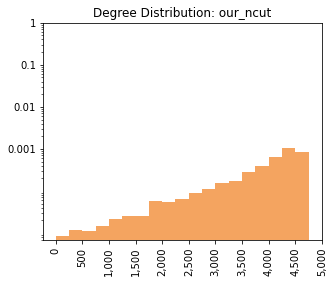

all_ycut Name: 
Type: Graph
Number of nodes: 4679
Number of edges: 6581757
Average degree: 2813.3178


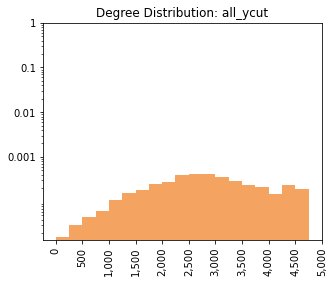

all_ncut Name: 
Type: Graph
Number of nodes: 4679
Number of edges: 9343924
Average degree: 3993.9833


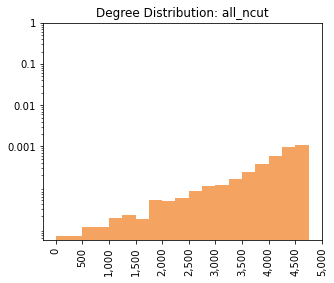

b_2011_ycut Name: 
Type: Graph
Number of nodes: 4186
Number of edges: 4554078
Average degree: 2175.8614


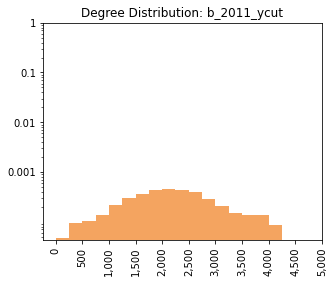

b_2011_ncut Name: 
Type: Graph
Number of nodes: 4186
Number of edges: 7012846
Average degree: 3350.6192


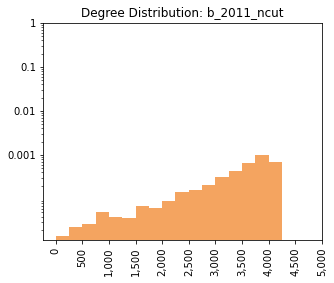

b_cos Name: 
Type: Graph
Number of nodes: 1596
Number of edges: 133106
Average degree: 166.7995


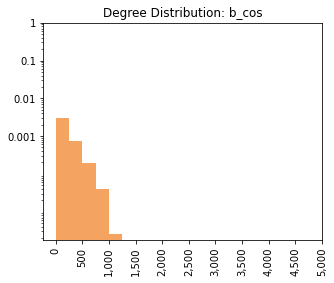

In [24]:
#16	次数のヒストグラムの形状は？
for i in df_list:
    
    G = nx.from_pandas_edgelist(eval(i),"disease_1", "disease_2" )
    print(i, nx.info(G))
    plt.subplots(figsize=(5,4))
    bins = range(0,5000,250)
    degrees_list = [val for (node, val) in G.degree()]    #plt.yscale("log")
    plt.hist(degrees_list, bins=bins,density=True,log=True, color="SandyBrown")
    plt.xticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
               ["0", "500", "1,000", "1,500", "2,000", "2,500", "3,000", "3,500", "4,000", "4,500", "5,000"])
    plt.yticks([1, 0.1, 0.01, 0.001],[1, 0.1, 0.01, 0.001])
    plt.xticks(rotation=90)
    plt.title('Degree Distribution: '+i)
    plt.show()

Name: 
Type: Graph
Number of nodes: 4304
Number of edges: 4891408
Average degree: 2272.9591


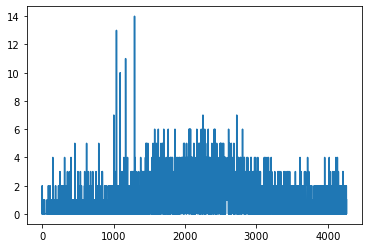

In [46]:
#次数分布、ノード間距離分布、隣接次数相関、クラスター性、中心性、コミュニティ構造、長距離にわたる次数相関、フラクタル性、頑強性
G = nx.from_pandas_edgelist(b_ycut,"disease_1", "disease_2" )
print(nx.info(G))
#plt.plot(nx.degree_histogram(G))

In [47]:
#次数中心性
print("degree centrality:")
for k, v in sorted(nx.degree_centrality(G).items(), key=lambda x: -x[1]):
  print(str(k)+":"+"{:.3}".format(v)+" ", end="")

degree centrality:
Pregnancy Complications:0.99 Intellectual Disability:0.99 Obesity:0.99 Hypertension:0.989 Neoplasms:0.989 Diabetes Mellitus, Type 2:0.987 Seizures:0.987 Occupational Diseases:0.987 Cardiovascular Diseases:0.986 Diabetes Mellitus:0.986 Postoperative Complications:0.985 Epilepsy:0.985 Coronary Disease:0.984 Abnormalities, Multiple:0.984 Myocardial Infarction:0.983 Sleep Wake Disorders:0.982 Vision Disorders:0.982 Paralysis:0.981 Brain Diseases:0.981 Parkinson Disease:0.981 Spinal Cord Injuries:0.98 Asthma:0.979 Breast Neoplasms:0.979 Deafness:0.979 Diabetes Mellitus, Type 1:0.978 Nervous System Diseases:0.978 Schizophrenia:0.978 Depressive Disorder:0.978 Blindness:0.977 Multiple Sclerosis:0.977 Mental Disorders:0.977 Coma:0.975 Quadriplegia:0.975 Peripheral Nervous System Diseases:0.975 Cerebrovascular Disorders:0.974 Skin Diseases:0.974 Hearing Loss, Sensorineural:0.973 Kidney Diseases:0.973 Pain, Postoperative:0.972 Paraplegia:0.972 Cognition Disorders:0.971 Erythema

In [48]:
#近接中心性
print("closeness centrality:")
for k, v in sorted(nx.closeness_centrality(G).items(), key=lambda x: -x[1]):
  print(str(k)+":"+"{:.3}".format(v)+" ", end="")

closeness centrality:
Pregnancy Complications:0.99 Intellectual Disability:0.99 Obesity:0.99 Hypertension:0.989 Neoplasms:0.989 Diabetes Mellitus, Type 2:0.988 Seizures:0.988 Occupational Diseases:0.987 Cardiovascular Diseases:0.986 Diabetes Mellitus:0.986 Postoperative Complications:0.986 Epilepsy:0.985 Coronary Disease:0.984 Abnormalities, Multiple:0.984 Myocardial Infarction:0.983 Sleep Wake Disorders:0.982 Vision Disorders:0.982 Paralysis:0.982 Brain Diseases:0.981 Parkinson Disease:0.981 Spinal Cord Injuries:0.981 Asthma:0.979 Breast Neoplasms:0.979 Deafness:0.979 Diabetes Mellitus, Type 1:0.979 Nervous System Diseases:0.979 Schizophrenia:0.979 Depressive Disorder:0.979 Blindness:0.978 Multiple Sclerosis:0.978 Mental Disorders:0.977 Coma:0.976 Quadriplegia:0.976 Peripheral Nervous System Diseases:0.976 Cerebrovascular Disorders:0.974 Skin Diseases:0.974 Hearing Loss, Sensorineural:0.974 Kidney Diseases:0.974 Pain, Postoperative:0.973 Paraplegia:0.972 Cognition Disorders:0.972 Eryt

In [49]:
#固有ベクトル中心性
print("eigenvector centrality:")
for k, v in sorted(nx.eigenvector_centrality(G).items(), key=lambda x: -x[1]):
  print(str(k)+":"+"{:.3}".format(v)+" ", end="")

eigenvector centrality:
Obesity:0.0236 Hypertension:0.0236 Seizures:0.0236 Diabetes Mellitus, Type 2:0.0236 Intellectual Disability:0.0236 Cardiovascular Diseases:0.0236 Pregnancy Complications:0.0236 Epilepsy:0.0236 Diabetes Mellitus:0.0236 Coronary Disease:0.0236 Abnormalities, Multiple:0.0236 Paralysis:0.0236 Neoplasms:0.0236 Occupational Diseases:0.0236 Vision Disorders:0.0236 Spinal Cord Injuries:0.0236 Parkinson Disease:0.0236 Sleep Wake Disorders:0.0236 Deafness:0.0236 Nervous System Diseases:0.0236 Depressive Disorder:0.0236 Multiple Sclerosis:0.0236 Asthma:0.0236 Quadriplegia:0.0236 Breast Neoplasms:0.0235 Coma:0.0235 Brain Diseases:0.0235 Blindness:0.0235 Diabetes Mellitus, Type 1:0.0235 Postoperative Complications:0.0235 Myocardial Infarction:0.0235 Hearing Loss, Sensorineural:0.0235 Peripheral Nervous System Diseases:0.0235 Spasm:0.0235 Schizophrenia:0.0235 Erythema:0.0235 Cerebrovascular Disorders:0.0235 Paraplegia:0.0235 Pain, Postoperative:0.0235 Inflammation:0.0235 Migr

In [50]:
#媒介中心性
print("betweenness centrality:")
for k, v in sorted(nx.betweenness_centrality(G).items(), key=lambda x: -x[1]):
  print(str(k)+":"+"{:.3}".format(v)+" ", end="")

betweenness centrality:


NetworkXError: random_state_index is incorrect

<ipython-input-63-83f1f538e3e8>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(df_list[:1]):


  0%|          | 0/1 [00:00<?, ?it/s]

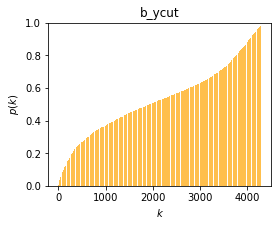

In [63]:
#15	次数のヒストグラムの形状
#次数分布 = 次数kを持つノードが、全ノードに占める割合

for i in tqdm(df_list[:1]):
    G = nx.from_pandas_edgelist(eval(i),"disease_1", "disease_2" )
    plt.subplots(figsize=(4,3))
    plt.bar(range(G.number_of_nodes()), 
            height=sorted([val/G.number_of_nodes() for (node, val) in G.degree()]),
            color="orange",
            alpha=0.7)
    plt.xlabel('$k$')
    plt.ylabel('$p(k)$')
    plt.ylim(0,1)
    #plt.yscale("log")
    #plt.yticks([0.001, 0.01, 0.1, 1], [0.001, 0.01, 0.1, 1])
    plt.title(i)
    plt.show()

<ipython-input-64-83f1f538e3e8>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(df_list[:1]):


  0%|          | 0/1 [00:00<?, ?it/s]

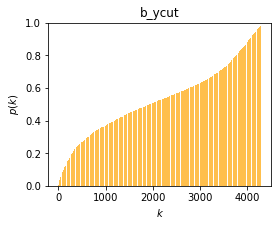

In [64]:
#15	次数のヒストグラムの形状
#次数分布 = 次数kを持つノードが、全ノードに占める割合

for i in tqdm(df_list[:1]):
    G = nx.from_pandas_edgelist(eval(i),"disease_1", "disease_2" )
    plt.subplots(figsize=(4,3))
    plt.bar(range(G.number_of_nodes()), 
            height=sorted([val/G.number_of_nodes() for (node, val) in G.degree()]),
            color="orange",
            alpha=0.7)
    plt.xlabel('$k$')
    plt.ylabel('$p(k)$')
    plt.ylim(0,1)
    #plt.yscale("log")
    #plt.yticks([0.001, 0.01, 0.1, 1], [0.001, 0.01, 0.1, 1])
    plt.title(i)
    plt.show()

<ipython-input-66-973d44dc450e>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(df_list[:1]):


  0%|          | 0/1 [00:00<?, ?it/s]

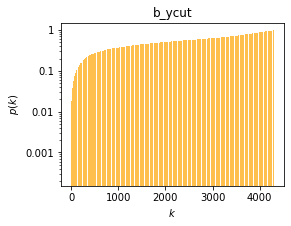

In [66]:
#15	次数のヒストグラムの形状
#次数分布 = 次数kを持つノードが、全ノードに占める割合
for i in tqdm(df_list[:1]):
    G = nx.from_pandas_edgelist(eval(i),"disease_1", "disease_2" )
    plt.subplots(figsize=(4,3))
    plt.bar(range(G.number_of_nodes()), 
            height=sorted([val/G.number_of_nodes() for (node, val) in G.degree()]),
            color="orange",
            alpha=0.7)
    plt.xlabel('$k$')
    plt.ylabel('$p(k)$')
    #plt.ylim(0,1)
    plt.yscale("log")
    plt.yticks([0.001, 0.01, 0.1, 1], [0.001, 0.01, 0.1, 1])
    plt.title(i)
    plt.show()

In [67]:
print(G.number_of_nodes())

4304


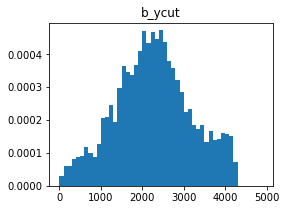

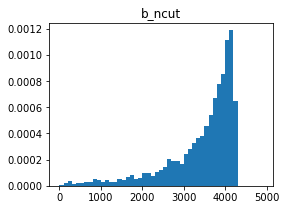

In [68]:
#15	次数のヒストグラムの形状
for i in df_list[:2]:
    G = nx.from_pandas_edgelist(eval(i),"disease_1", "disease_2" )
    plt.subplots(figsize=(4,3))
    bins = range(0,5000,100)
    degrees_list = [val for (node, val) in G.degree()]
    plt.hist(degrees_list, bins=bins,density=True)
    plt.title(i)
    #plt.yscale("log")
    plt.show()

Name: 
Type: Graph
Number of nodes: 4304
Number of edges: 7403646
Average degree: 3440.3559


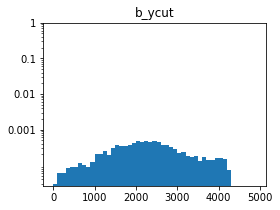

In [69]:
#16	次数のヒストグラムの形状は？
for i in df_list[:1]:
    print(nx.info(G))
    G = nx.from_pandas_edgelist(eval(i),"disease_1", "disease_2" )
    plt.subplots(figsize=(4,3))
    bins = range(0,5000,100)
    degrees_list = [val for (node, val) in G.degree()]
    plt.hist(degrees_list, bins=bins,density=True)
    plt.title(i)
    plt.yscale("log")
    plt.yticks([1, 0.1, 0.01, 0.001],[1, 0.1, 0.01, 0.001])
    plt.show()

Name: 
Type: Graph
Number of nodes: 4304
Number of edges: 4891408
Average degree: 2272.9591


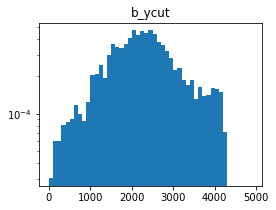

In [70]:
#16	次数のヒストグラムの形状は？
for i in df_list[:1]:
    print(nx.info(G))
    G = nx.from_pandas_edgelist(eval(i),"disease_1", "disease_2" )
    plt.subplots(figsize=(4,3))
    bins = range(0,5000,100)
    degrees_list = [val for (node, val) in G.degree()]
    plt.hist(degrees_list, bins=bins,density=True)
    plt.title(i)
    plt.yscale("log")
    plt.show()

In [71]:
#半分の疾患(バラバシの場合 4219/2=2110疾患)より大きい次数を持つ疾患MeSHタームの割合？
for i in df_list:
    G = nx.from_pandas_edgelist(eval(i),"disease_1", "disease_2" )
    num = pd.DataFrame(G.degree)[ pd.DataFrame(G.degree)[[1]]>(len(G.nodes)/2) ][1].count()
    print(i, len(G.nodes), len(G.nodes)/2, num , num/len(G.nodes))

b_ycut 4304 2152.0 2371 0.5508828996282528
b_ncut 4304 2152.0 3910 0.908457249070632
our_ycut 4662 2331.0 3041 0.6522951522951523
our_ncut 4662 2331.0 4373 0.938009438009438
all_ycut 4679 2339.5 3226 0.6894635605898697
all_ncut 4679 2339.5 4428 0.9463560589869631
b_2011_ycut 4186 2093.0 2226 0.5317725752508361
b_2011_ncut 4186 2093.0 3806 0.9092212135690396
b_cos 1596 798.0 5 0.003132832080200501


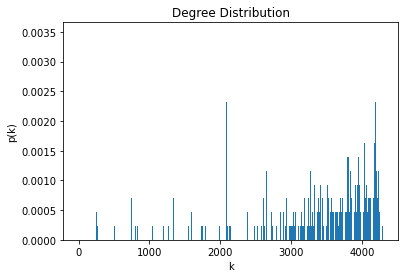

In [72]:
# omake
G = nx.from_pandas_edgelist(eval("b_ncut"),"disease_1", "disease_2" )
degree_hist = nx.degree_histogram(G) 
degree_hist = np.array(degree_hist, dtype=float)
degree_prob = degree_hist/G.number_of_nodes()
plt.bar(np.arange(degree_prob.shape[0]),degree_prob)
plt.xlabel('k')
plt.ylabel('p(k)')
plt.title('Degree Distribution')
plt.show()

<BarContainer object of 2437 artists>

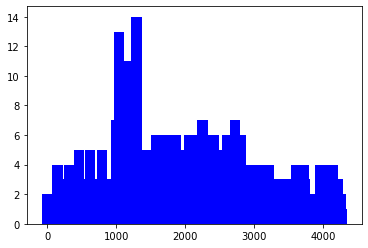

In [73]:
# omake2!
G = nx.from_pandas_edgelist(eval('b_ycut'),"disease_1", "disease_2" )
degree_sequence=sorted([d for n,d in G.degree()], reverse=True) 
degreeCount=collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=150, color='b')

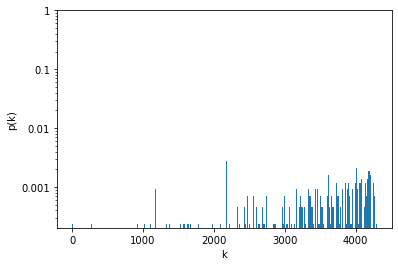

In [74]:
# omake
G = nx.from_pandas_edgelist(eval("b_ncut"),"disease_1", "disease_2" )
degree_hist = nx.degree_histogram(G) 
degree_hist = np.array(degree_hist, dtype=float)
degree_prob = degree_hist/G.number_of_nodes()
plt.bar(np.arange(degree_prob.shape[0]),degree_prob)
plt.xlabel('k')
plt.ylabel('p(k)')
plt.yscale("log")
plt.yticks([1, 0.1, 0.01, 0.001],[1, 0.1, 0.01, 0.001])
plt.show()

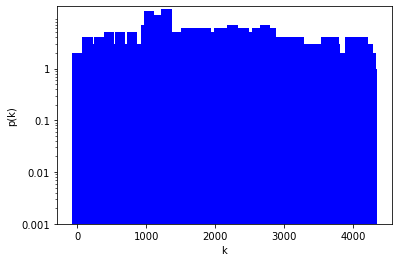

In [75]:
# omake2!
G = nx.from_pandas_edgelist(eval('b_ycut'),"disease_1", "disease_2" )
degree_sequence=sorted([d for n,d in G.degree()], reverse=True) 
degreeCount=collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fig, ax = plt.subplots()
plt.bar(deg, cnt, width=150, color='b')
plt.xlabel('k')
plt.ylabel('p(k)')
plt.yscale("log")
plt.yticks([1, 0.1, 0.01, 0.001],[1, 0.1, 0.01, 0.001])
plt.show()

In [84]:
os.chdir('/home/admin_user')
pd.read_csv("graph_01.csv")

,disease_1,disease_2,cosine_similarity
0,"ACTH Syndrome, Ectopic","46, XX Disorders of Sex Development",0.135159
1,AIDS Dementia Complex,22q11 Deletion Syndrome,0.100250
2,AIDS-Related Opportunistic Infections,AIDS-Related Complex,0.410919
3,Abdominal Abscess,AIDS-Related Opportunistic Infections,0.126770
4,Abdominal Injuries,Abdominal Abscess,0.665750
...,...,...,...
1567685,von Willebrand Diseases,"Wounds, Gunshot",0.167993
1567686,von Willebrand Diseases,"Wounds, Penetrating",0.109197
1567687,von Willebrand Diseases,"von Willebrand Disease, Type 1",0.308643
1567688,von Willebrand Diseases,"von Willebrand Disease, Type 2",0.515627


In [85]:
pd.read_csv("graph_01.csv")["cosine_similarity"].min()

0.1000002188794385

In [81]:
our_ycut[our_ycut["cosine_similarity"]>0.9]

,disease_1,disease_2,cosine_similarity
349,Accessory Nerve Injuries,Accessory Nerve Diseases,0.922120
363,Achlorhydria,AIDS-Related Opportunistic Infections,0.917483
461,Acidosis,Acid-Base Imbalance,0.907192
2608,"Adenoma, Pleomorphic",Adenolymphoma,0.957077
2679,"Adenoma, Villous",Achlorhydria,0.925535
...,...,...,...
6310595,"von Willebrand Disease, Type 3",Nose Neoplasms,0.937257
6310801,"von Willebrand Disease, Type 3",Rhinosporidiosis,0.930459
6310901,"von Willebrand Disease, Type 3","Telangiectasia, Hereditary Hemorrhagic",0.952159
6311013,"von Willebrand Disease, Type 3","von Willebrand Disease, Type 1",0.960837


In [87]:
#MeSH 読込

filename_mesh = 'mesh_list_2021.pickle'

with open(filename_mesh, 'rb') as f:
    mesh_list = pickle.load(f)

#メッシュから　メッシュIDと疾患/症状メッシュ、TreeNumber を取り出す
#疾患メッシュ：Cのうち C22（動物)とC23.888（症状）を除外したもの）＋F03（精神障害）
#症状メッシュ：C23.888
mesh_diseases = [descriptor for descriptor in tqdm(mesh_list) for uid in descriptor[-1] if ((uid.startswith("C")==True) & (uid.startswith("C22")!=True)&(uid.startswith("C23.888")!=True)) | (uid.startswith("F03")==True) ]
mesh_symptoms = [descriptor for descriptor in tqdm(mesh_list)  for uid in descriptor[-1] if (uid.startswith("C23.888")==True)]
#さらにメッシュ名だけにする＋重複削除
mesh_diseases= pd.DataFrame(mesh_diseases)[1].drop_duplicates(keep='last').reset_index(drop=True).values.tolist()
mesh_symptoms= pd.DataFrame(mesh_symptoms)[1].drop_duplicates(keep='last').reset_index(drop=True).values.tolist()

len(mesh_list),len(mesh_diseases), len(mesh_symptoms)

<ipython-input-87-fdb6fc9ad1ca>:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  mesh_diseases = [descriptor for descriptor in tqdm(mesh_list) for uid in descriptor[-1] if ((uid.startswith("C")==True) & (uid.startswith("C22")!=True)&(uid.startswith("C23.888")!=True)) | (uid.startswith("F03")==True) ]


  0%|          | 0/29917 [00:00<?, ?it/s]

<ipython-input-87-fdb6fc9ad1ca>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  mesh_symptoms = [descriptor for descriptor in tqdm(mesh_list)  for uid in descriptor[-1] if (uid.startswith("C23.888")==True)]


  0%|          | 0/29917 [00:00<?, ?it/s]

(29917, 4887, 394)

In [89]:
tree_cate = sorted([ [item, mesh[1]] for mesh in mesh_list for item in mesh[-1] if (len(item) == 3) ] )
tree_cate[:3]

[['A01', 'Body Regions'],
 ['A02', 'Musculoskeletal System'],
 ['A03', 'Digestive System']]

In [90]:
pd.DataFrame(tree_cate)

,0,1
0,A01,Body Regions
1,A02,Musculoskeletal System
2,A03,Digestive System
3,A04,Respiratory System
4,A05,Urogenital System
...,...,...
111,V01,Publication Components
112,V02,Publication Formats
113,V03,Study Characteristics
114,V04,Support of Research


In [ ]:
    #ユニークな疾患名がどのメッシュカテゴリーに含まれるか
    disease_category = []
    for  disease in val_3["disease_2"]:
        for mesh in mesh_list:
            if disease == mesh[1]:
                disease_category.extend ([[disease, m] for m in mesh[-1]])
                
    val_4 = pd.merge(val_3, pd.DataFrame(disease_category, columns=["disease_2", "treecode"]), on="disease_2")
    
    val_4["treename"]=0
    for enu, code in enumerate(val_4["treecode"]):
        val_4["treename"][enu] = code[:3]

In [228]:
three_tree_cate = []
for i in tqdm(mesh_list[:]):
    for s in i[-1]:
        three_tree_cate.append([i[1], s[:3]])
        break;
len(three_tree_cate)

<ipython-input-228-ca218ec1c794>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(mesh_list[:]):


  0%|          | 0/29917 [00:00<?, ?it/s]

29915

In [254]:
disease_category = []
for i in tqdm(mesh_diseases[:]):
    for s in mesh_list:
        if i ==s[1]:
            for m in s[-1]:
                disease_category.append([s[1], m[:3]])
                break;
len(disease_category)

<ipython-input-254-f48b11fc2d66>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm(mesh_diseases[:]):


  0%|          | 0/4887 [00:00<?, ?it/s]

4887

In [262]:
disease_category_df = pd.DataFrame(disease_category)
disease_category_df.columns=["disease_1", "disease_1_category"]
our_ycut_with_catgory = pd.merge(our_ycut, disease_category_df, on=["disease_1"])

disease_category_df.columns=["disease_2", "disease_2_category"]
our_ycut_with_catgory = pd.merge(our_ycut_with_catgory, disease_category_df, on=["disease_2"])
our_ycut_with_catgory

,disease_1,disease_2,cosine_similarity,disease_1_category,disease_2_category
0,"ACTH Syndrome, Ectopic","46, XX Disorders of Sex Development",0.135159,C04,C12
1,AIDS Dementia Complex,"46, XX Disorders of Sex Development",0.038676,C01,C12
2,AIDS-Related Opportunistic Infections,"46, XX Disorders of Sex Development",0.001333,C01,C12
3,Abdominal Abscess,"46, XX Disorders of Sex Development",0.050325,C01,C12
4,Abdominal Injuries,"46, XX Disorders of Sex Development",0.048455,C26,C12
...,...,...,...,...,...
6313775,"von Willebrand Disease, Type 3","von Willebrand Disease, Type 1",0.960837,C15,C15
6313776,von Willebrand Diseases,"von Willebrand Disease, Type 1",0.308643,C15,C15
6313777,"von Willebrand Disease, Type 3","von Willebrand Disease, Type 2",0.662424,C15,C15
6313778,von Willebrand Diseases,"von Willebrand Disease, Type 2",0.515627,C15,C15


In [253]:
disease_mesh_cate_df.columns=["disease_2", "disease_2_tree"]
our_ycut_n = pd.merge(our_ycut_n, disease_mesh_cate_df, on=["disease_2"])
our_ycut_with_cate

,disease_1,disease_2,cosine_similarity,disease_1_tree,disease_2_tree
0,"ACTH Syndrome, Ectopic","46, XX Disorders of Sex Development",0.135159,C04,C12
1,AIDS Dementia Complex,"46, XX Disorders of Sex Development",0.038676,C01,C12
2,AIDS-Related Opportunistic Infections,"46, XX Disorders of Sex Development",0.001333,C01,C12
3,Abdominal Abscess,"46, XX Disorders of Sex Development",0.050325,C01,C12
4,Abdominal Injuries,"46, XX Disorders of Sex Development",0.048455,C26,C12
...,...,...,...,...,...
6313775,"von Willebrand Disease, Type 3","von Willebrand Disease, Type 1",0.960837,C15,C15
6313776,von Willebrand Diseases,"von Willebrand Disease, Type 1",0.308643,C15,C15
6313777,"von Willebrand Disease, Type 3","von Willebrand Disease, Type 2",0.662424,C15,C15
6313778,von Willebrand Diseases,"von Willebrand Disease, Type 2",0.515627,C15,C15


os.chdir('/home/admin_user/デスクトップ/pubmed_after_cutoff')
our_ycut= pd.read_csv("hsdn.csv") #our_try
our_ycut #6313780